In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb

#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [2]:
alpha = 0.05
theta = 0.4
n = 20

In [12]:
counter = 0

for n in [20, 50, 100]:
    for theta in [0.1, 0.4, 0.5, 0.9]:
        len1 = []; len2 = []
        for i in range(100):
            mini_sample = stat.bernoulli(theta).rvs(n)
            mean = mini_sample.mean()

            Rend1 = mean + stat.norm.ppf(1 - alpha/2) / m.sqrt(n) * (m.sqrt(mean * (1 - mean)))
            Lend1 = mean - stat.norm.ppf(1 - alpha/2) / m.sqrt(n) * (m.sqrt(mean * (1 - mean)))
            len1.append(2 * stat.norm.ppf(1 - alpha/2) / m.sqrt(n) * (m.sqrt(mean * (1 - mean))))

            Rend2 = np.arcsin(m.sqrt(mean)) + (stat.norm.ppf(1 - alpha/2)) / (m.sqrt(n)) * 0.5
            Lend2 = np.arcsin(m.sqrt(mean)) - (stat.norm.ppf(1 - alpha/2)) / (m.sqrt(n)) * 0.5
            len2.append((stat.norm.ppf(1 - alpha/2)) / (m.sqrt(n)))
        print('For n =', n, 'theta =', theta)
        print('len1 =', round(np.array(len1).mean(), 3), 'len2 =', round(np.array(len2).mean(), 3))
        print('\n')
    

For n = 20 theta = 0.1
len1 = 0.241 len2 = 0.438


For n = 20 theta = 0.4
len1 = 0.414 len2 = 0.438


For n = 20 theta = 0.5
len1 = 0.425 len2 = 0.438


For n = 20 theta = 0.9
len1 = 0.228 len2 = 0.438


For n = 50 theta = 0.1
len1 = 0.161 len2 = 0.277


For n = 50 theta = 0.4
len1 = 0.27 len2 = 0.277


For n = 50 theta = 0.5
len1 = 0.274 len2 = 0.277


For n = 50 theta = 0.9
len1 = 0.166 len2 = 0.277


For n = 100 theta = 0.1
len1 = 0.117 len2 = 0.196


For n = 100 theta = 0.4
len1 = 0.191 len2 = 0.196


For n = 100 theta = 0.5
len1 = 0.195 len2 = 0.196


For n = 100 theta = 0.9
len1 = 0.115 len2 = 0.196




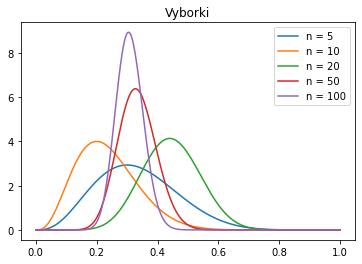

In [8]:
def generate(a, b, n):
    sample = []
    for i in range(n):
        theta = stat.beta(a, b).rvs()
        sample.append(stat.bernoulli(theta).rvs())
    return np.array(sample)

x = np.linspace(0, 1, 1000)

a = 2; b = 5
for n in [5, 10, 20, 50, 100]:
    sample = generate(a, b, n)
    sum = sample.sum()
    plt.title("Vyborki")
    plt.plot(x, stat.beta(sum + a, n - sum + b).pdf(x), label = 'n = ' + str(n))
    plt.legend()
#plt.plot(x, stat.cauchy(loc = 3).pdf(x))

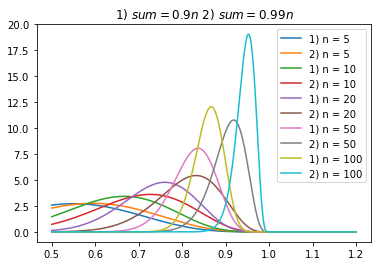

In [7]:
x = np.linspace(0.5, 1.2, 1000)
for n in [5, 10, 20, 50, 100]:
    plt.title("1) $sum = 0.9n$ 2) $sum = 0.99n$")
    sum = n * 0.9
    plt.plot(x, stat.beta(sum + a, n - sum + b).pdf(x), label = '1) n = ' + str(n))
    
    sum = n * 0.99
    plt.plot(x, stat.beta(sum + a, n - sum + b).pdf(x), label = '2) n = ' + str(n))

    plt.legend()